# Alzheimer's Disease Classification using Vision Transformer (ViT)

This notebook uses a pre-trained Vision Transformer (ViT-B/16) model to classify MRI images into four categories of Alzheimer's disease:
- AD (Alzheimer's Disease)
- CN (Cognitively Normal)
- EMCI (Early Mild Cognitive Impairment)
- LMCI (Late Mild Cognitive Impairment)


In [18]:
# First, let's check if torchvision is installed
import torch
print(f"PyTorch version: {torch.__version__}")

try:
    import torchvision
    print(f"torchvision version: {torchvision.__version__}")
except ImportError:
    print("torchvision is not installed. Please run: pip install torchvision")


PyTorch version: 2.6.0
torchvision version: 0.21.0


## Importing the Alzheimer's ViT Module

First, let's import all the necessary functions from our `alzheimer_vit.py` file.

In [19]:
# Import functions from alzheimer_vit.py
from alzheimer_vit import (
    AlzheimerDataset, 
    data_transforms, 
    dataset, 
    train_loader, 
    val_loader, 
    model, 
    criterion, 
    optimizer, 
    scheduler, 
    show_samples, 
    train_model, 
    evaluate_model, 
    save_model
)

# Check if CUDA is available
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Check for MPS (Metal Performance Shaders) for Apple Silicon Macs
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using MPS device")
elif torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Using CUDA device")
else:
    device = torch.device("cpu")
    print("Using CPU device")


Using MPS device


## 1. Data Exploration and Visualization

Let's explore the dataset and visualize some sample images.

In [20]:
# Print dataset information
print(f"Total number of samples: {len(dataset)}")
print(f"Number of training samples: {len(train_loader.dataset)}")
print(f"Number of validation samples: {len(val_loader.dataset)}")
print(f"Number of classes: {len(dataset.classes)}")
print(f"Classes: {dataset.classes}")


Total number of samples: 33984
Number of training samples: 27187
Number of validation samples: 6797
Number of classes: 4
Classes: ['AD', 'CN', 'EMCI', 'LMCI']


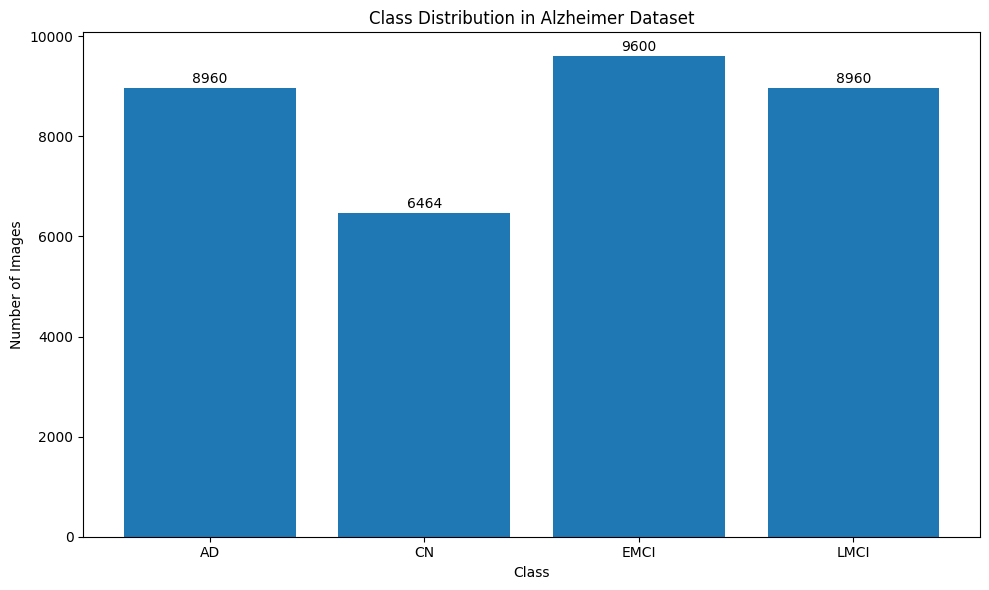

In [21]:
# Visualize class distribution
import matplotlib.pyplot as plt
import numpy as np

class_counts = {}
for _, label in dataset.samples:
    class_name = dataset.classes[label]
    if class_name in class_counts:
        class_counts[class_name] += 1
    else:
        class_counts[class_name] = 1

plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.title('Class Distribution in Alzheimer Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=0)
for i, (key, value) in enumerate(class_counts.items()):
    plt.text(i, value + 100, str(value), ha='center')
plt.tight_layout()
plt.show()


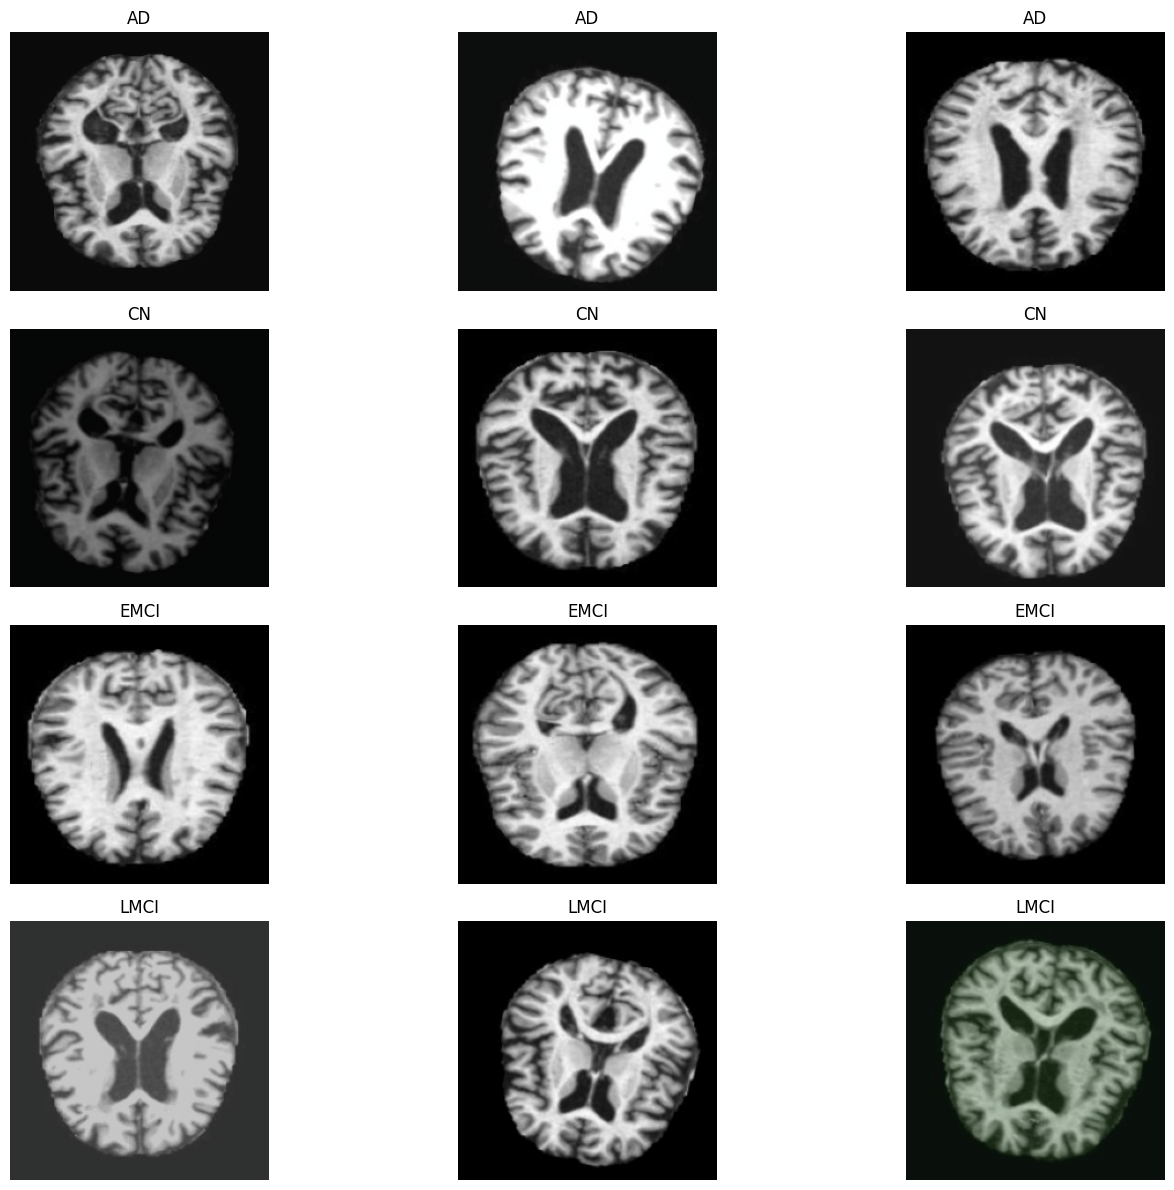

In [22]:
# Show sample images from each class
show_samples(dataset)


## 2. Model Training

Now let's train our Vision Transformer model.

In [23]:
# Print model summary
print(model)

# Print number of parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")


VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [ ]:
# Train the model
num_epochs = 10  # You can adjust this
model, history = train_model(model, criterion, optimizer, scheduler, num_epochs=num_epochs)


Epoch 1/10
----------


train:   0%|          | 0/850 [00:00<?, ?it/s]

Using MPS device
PyTorch version: 2.6.0
Total number of samples: 33984
Number of training samples: 27187
Number of validation samples: 6797
Number of classes: 4
Classes: ['AD', 'CN', 'EMCI', 'LMCI']
Figure(1000x600)
Figure(1500x1200)
Using MPS device
PyTorch version: 2.6.0
Total number of samples: 33984
Number of training samples: 27187
Number of validation samples: 6797
Number of classes: 4
Classes: ['AD', 'CN', 'EMCI', 'LMCI']
Figure(1000x600)
Figure(1500x1200)
Using MPS device
PyTorch version: 2.6.0
Total number of samples: 33984
Number of training samples: 27187
Number of validation samples: 6797
Number of classes: 4
Classes: ['AD', 'CN', 'EMCI', 'LMCI']
Figure(1000x600)
Figure(1500x1200)
Using MPS device
PyTorch version: 2.6.0
Total number of samples: 33984
Number of training samples: 27187
Number of validation samples: 6797
Number of classes: 4
Classes: ['AD', 'CN', 'EMCI', 'LMCI']
Figure(1000x600)
Figure(1500x1200)


train:   0%|          | 2/850 [00:16<1:41:47,  7.20s/it]

## 3. Model Evaluation

After training, we can evaluate the model's performance.

Evaluating:   0%|          | 0/213 [00:00<?, ?it/s]

Using MPS device
PyTorch version: 2.6.0
Total number of samples: 33984
Number of training samples: 27187
Number of validation samples: 6797
Number of classes: 4
Classes: ['AD', 'CN', 'EMCI', 'LMCI']
Figure(1000x600)
Figure(1500x1200)
Using MPS device
PyTorch version: 2.6.0
Total number of samples: 33984
Number of training samples: 27187
Number of validation samples: 6797
Number of classes: 4
Classes: ['AD', 'CN', 'EMCI', 'LMCI']
Figure(1000x600)
Figure(1500x1200)
Using MPS device
PyTorch version: 2.6.0
Total number of samples: 33984
Number of training samples: 27187
Number of validation samples: 6797
Number of classes: 4
Classes: ['AD', 'CN', 'EMCI', 'LMCI']
Figure(1000x600)
Figure(1500x1200)
Using MPS device
PyTorch version: 2.6.0
Total number of samples: 33984
Number of training samples: 27187
Number of validation samples: 6797
Number of classes: 4
Classes: ['AD', 'CN', 'EMCI', 'LMCI']
Figure(1000x600)
Figure(1500x1200)


Evaluating: 100%|██████████| 213/213 [03:43<00:00,  1.05s/it]

Test Accuracy: 0.9806


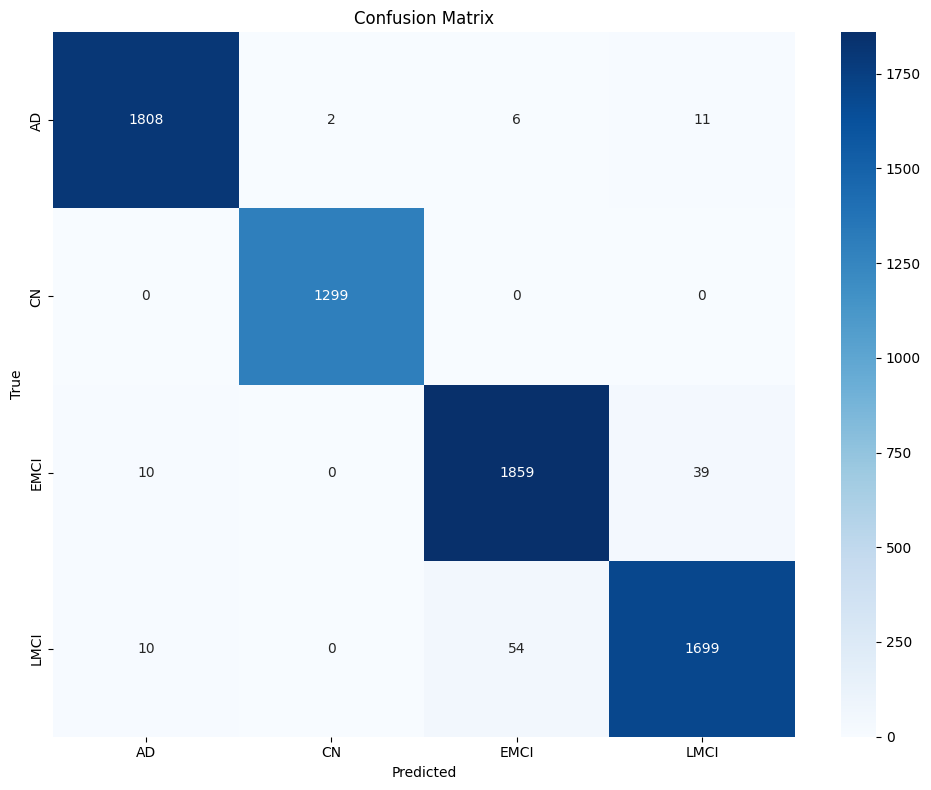


Classification Report:
              precision    recall  f1-score   support

          AD       0.99      0.99      0.99      1827
          CN       1.00      1.00      1.00      1299
        EMCI       0.97      0.97      0.97      1908
        LMCI       0.97      0.96      0.97      1763

    accuracy                           0.98      6797
   macro avg       0.98      0.98      0.98      6797
weighted avg       0.98      0.98      0.98      6797



In [25]:
# Evaluate the model
evaluate_model(model, val_loader)


In [26]:
# Save the model
save_model(model, 'vit_alzheimer_model.pth')


Model saved to vit_alzheimer_model.pth


## 4. Model Interpretation

Let's visualize some predictions from our model.

RuntimeError: Input type (MPSFloatType) and weight type (torch.FloatTensor) should be the same

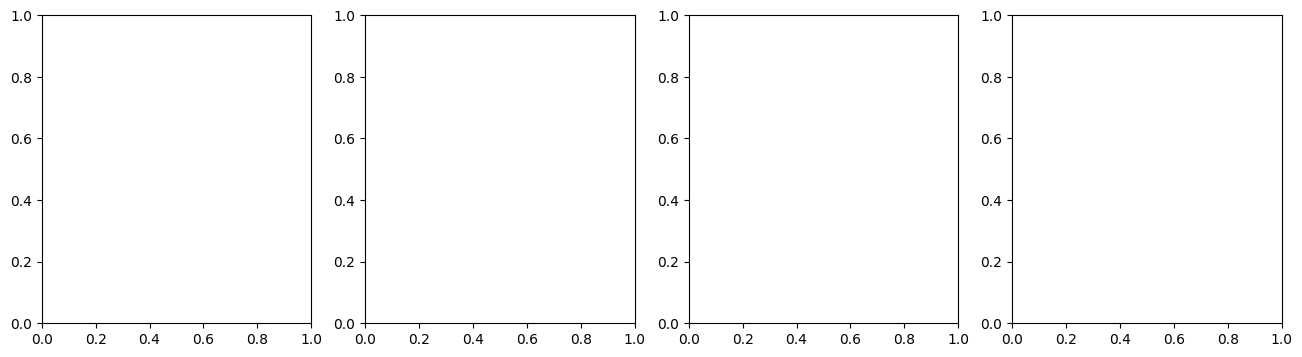

In [27]:
# Function to visualize predictions
import random
from PIL import Image

def visualize_predictions(model, dataset, num_samples=4):
    # Get random samples
    indices = random.sample(range(len(dataset)), num_samples)
    
    fig, axes = plt.subplots(1, num_samples, figsize=(16, 4))
    
    model.eval()
    with torch.no_grad():
        for i, idx in enumerate(indices):
            img, true_label = dataset[idx]
            
            # Get prediction
            input_tensor = img.unsqueeze(0).to(device)
            output = model(input_tensor)
            _, pred = torch.max(output, 1)
            
            # Convert tensor to numpy for visualization
            img = img.numpy().transpose((1, 2, 0))
            # Denormalize
            mean = np.array([0.485, 0.456, 0.406])
            std = np.array([0.229, 0.224, 0.225])
            img = std * img + mean
            img = np.clip(img, 0, 1)
            
            # Display image and prediction
            axes[i].imshow(img)
            true_class = dataset.classes[true_label]
            pred_class = dataset.classes[pred.item()]
            color = 'green' if true_label == pred.item() else 'red'
            axes[i].set_title(f"True: {true_class}\nPred: {pred_class}", color=color)
            axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize predictions
visualize_predictions(model, dataset)
